In [1]:
import copy
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Define parameters for plots

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [3]:
fontsize = 25
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}

# Plot potential figure

In [4]:
sigma = 3.405 # angstroms
epsilon = 0.238
U0 = epsilon
delta = 0.5
x0 = 5

In [5]:
myx = np.linspace(-25, 25, 1000)
U = 2 * U0 * (np.arctan((myx + x0) / delta) - np.arctan((myx - x0) / delta))
F = 2 * U0 / ((myx - x0)**2)/delta**2 - U0 / ((myx + x0)**2)/delta**2


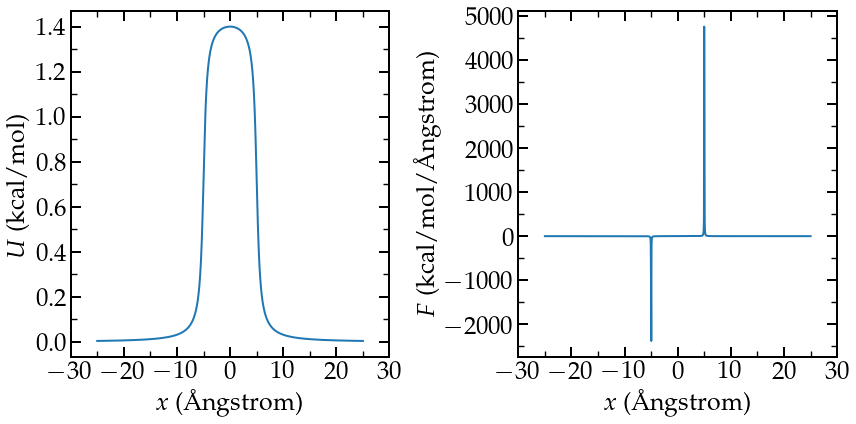

In [6]:
fig = plt.figure(figsize=(12, 6))

ax2 = fig.add_subplot(121)
plt.plot(myx, U, linewidth = 2, label = "undeformed")
#divider = make_axes_locatable(ax1)
ax2.set_ylabel(r'$U$ (kcal/mol)', fontdict=font)
ax2.set_xlabel(r'$x$ (Ångstrom)', fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.ylim(0, 60)
ax2.minorticks_on()
ax2.tick_params('both', length=10, width=2, which='major', direction='in')
ax2.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.spines["top"].set_linewidth(2)
ax2.spines["bottom"].set_linewidth(2)
ax2.spines["left"].set_linewidth(2)
ax2.spines["right"].set_linewidth(2)
ax2.set_xticks([-30, -20, -10, 0, 10, 20, 30])
#ax2.set_yticks([0, 0.05, 0.1, 0.15])
#labels = ['0', '$1.4$', '$2.8$', '$4.2$']
#ax2.set_yticklabels(labels)
minor_locator_y = AutoMinorLocator(2)
ax2.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax2.xaxis.set_minor_locator(minor_locator_x)

ax2 = fig.add_subplot(122)
plt.plot(myx, F, linewidth = 2, label = "undeformed")
#divider = make_axes_locatable(ax1)
ax2.set_ylabel(r'$F$ (kcal/mol/Ångstrom)', fontdict=font)
ax2.set_xlabel(r'$x$ (Ångstrom)', fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.ylim(0, 60)
ax2.minorticks_on()
ax2.tick_params('both', length=10, width=2, which='major', direction='in')
ax2.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.spines["top"].set_linewidth(2)
ax2.spines["bottom"].set_linewidth(2)
ax2.spines["left"].set_linewidth(2)
ax2.spines["right"].set_linewidth(2)
ax2.set_xticks([-30, -20, -10, 0, 10, 20, 30])
#ax2.set_yticks([0, 0.05, 0.1, 0.15])
#labels = ['0', '$1.4$', '$2.8$', '$4.2$']
#ax2.set_yticklabels(labels)
minor_locator_y = AutoMinorLocator(2)
ax2.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax2.xaxis.set_minor_locator(minor_locator_x)

#ax2.legend(frameon=False, fontsize=fontsize, loc='upper right', handletextpad=0.5,
#          handlelength = 0.5, borderpad = 0.4, labelspacing=0.3) 

fig.tight_layout()
plt.savefig('EnergyAndPotential.png', bbox_inches = 'tight', pad_inches = 0.057)  
plt.show()

# Plot density

In [7]:
rho_0 = 0.0011 # approximately

In [8]:
file1 = open('density_profile_10run.dat', 'r')
Lines = file1.readlines()
Lines = Lines[3:]
twoDmap_bond = []
all_profile = []
for i in range(len(Lines) // 51):
    n = i*51 + 1
    m = (i+1)*51
    matrix = Lines[n:m]
    data = []
    for line in matrix:
        splitted = np.float32(line.split())    
        data.append([splitted[1], splitted[3]])
    data = np.array(data)
    x = data.T[0]
    all_profile.append(data.T[1])
# 3: 17
rho_mean_10 = np.mean(all_profile, axis=0)
rho_err_10 = np.std(all_profile, axis=0) / np.sqrt(i)

In [9]:
file1 = open('density_profile_10run.dat', 'r')
Lines = file1.readlines()
Lines = Lines[3:]
twoDmap_bond = []
all_profile = []
for i in range(len(Lines) // 51):
    if i == 0:
        n = i*51 + 1
        m = (i+1)*51
        matrix = Lines[n:m]
        data = []
        for line in matrix:
            splitted = np.float32(line.split())    
            data.append([splitted[1], splitted[3]])
        data = np.array(data)
        x = data.T[0]
        all_profile.append(data.T[1])
# 3: 17
rho_mean_1 = np.mean(all_profile, axis=0)
rho_err_1 = np.std(all_profile, axis=0) / np.sqrt(i)

In [10]:
file2 = open('density_evolution.dat', 'r')
Lines = file2.readlines()
Lines = Lines[2:]
rho_evol = []
for line in Lines:
    line_splitted = line.split()
    timestep, density_central = np.int32(line_splitted[0]), \
                                         np.float32(line_splitted[1])
        
    rho_evol.append([timestep, density_central])    
rho_evol = np.array(rho_evol)    

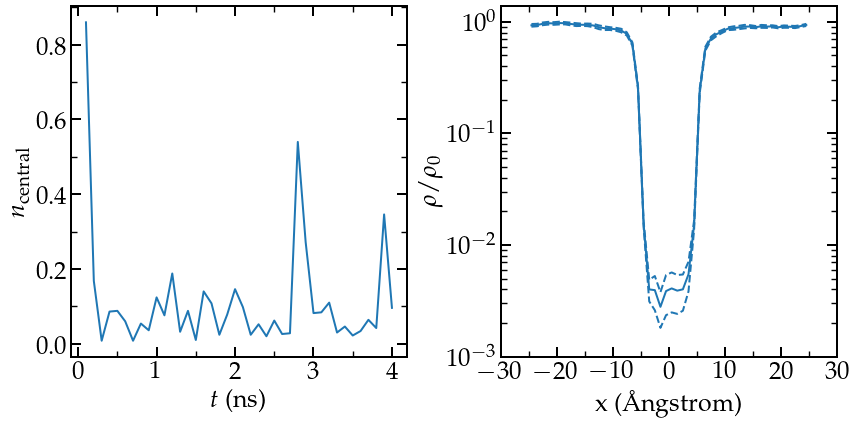

In [11]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
ax1.plot(rho_evol.T[0]*2/1000000, rho_evol.T[1], 
        color = 'tab:blue', linewidth = 2)
#divider = make_axes_locatable(ax1)
ax1.set_ylabel(r'$n_\mathrm{central}$', fontdict=font)
ax1.set_xlabel(r'$t$ (ns)', fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.ylim(0, 60)
ax1.minorticks_on()
ax1.tick_params('both', length=10, width=2, which='major', direction='in')
ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.set_xticks([0, 1, 2, 3, 4])
#ax2.set_yticks([0, 0.05, 0.1, 0.15])
#labels = ['0', '$1.4$', '$2.8$', '$4.2$']
#ax2.set_yticklabels(labels)
minor_locator_y = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator_x)

ax2 = fig.add_subplot(122)
ax2.semilogy(x, rho_mean_10 / rho_0, linewidth = 2, color = 'tab:blue')
ax2.semilogy(x, rho_mean_10 / rho_0 + rho_err_10 / rho_0, '--', linewidth = 2, color = 'tab:blue')
ax2.semilogy(x, rho_mean_10 / rho_0 - rho_err_10 / rho_0, '--', linewidth = 2, color = 'tab:blue')

#divider = make_axes_locatable(ax1)
ax2.set_ylabel(r'$\rho / \rho_0$ ', fontdict=font)
ax2.set_xlabel(r'x (Ångstrom)', fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.ylim(0, 60)
ax2.minorticks_on()
ax2.tick_params('both', length=10, width=2, which='major', direction='in')
ax2.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.spines["top"].set_linewidth(2)
ax2.spines["bottom"].set_linewidth(2)
ax2.spines["left"].set_linewidth(2)
ax2.spines["right"].set_linewidth(2)
ax2.set_xticks([-30, -20, -10, 0, 10, 20, 30])
ax2.set_yticks([1e-3, 1e-2, 1e-1, 1])
#labels = ['0', '$1.4$', '$2.8$', '$4.2$']
#ax2.set_yticklabels(labels)
#minor_locator_y = AutoMinorLocator(2)
#ax2.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax2.xaxis.set_minor_locator(minor_locator_x)

#ax2.legend(frameon=False, fontsize=fontsize, loc='upper right', handletextpad=0.5,
#          handlelength = 0.5, borderpad = 0.4, labelspacing=0.3) 

fig.tight_layout()
plt.savefig('Density.png', bbox_inches = 'tight', pad_inches = 0.057)  
plt.show()

# Plot potential

In [12]:
R = 8.31446 # J⋅K−1⋅mol−1
T = 119.8 # K
U_free_sampling_10 = - R*T * np.log(rho_mean_10 / rho_0)
U_free_sampling_10 /= 4184 # kcal / mol
U_free_sampling_1 = - R*T * np.log(rho_mean_1 / rho_0)
U_free_sampling_1 /= 4184 # kcal / mol

<ipython-input-12-57b53c00a3b5>:5: RuntimeWarning: divide by zero encountered in log
  U_free_sampling_1 = - R*T * np.log(rho_mean_1 / rho_0)


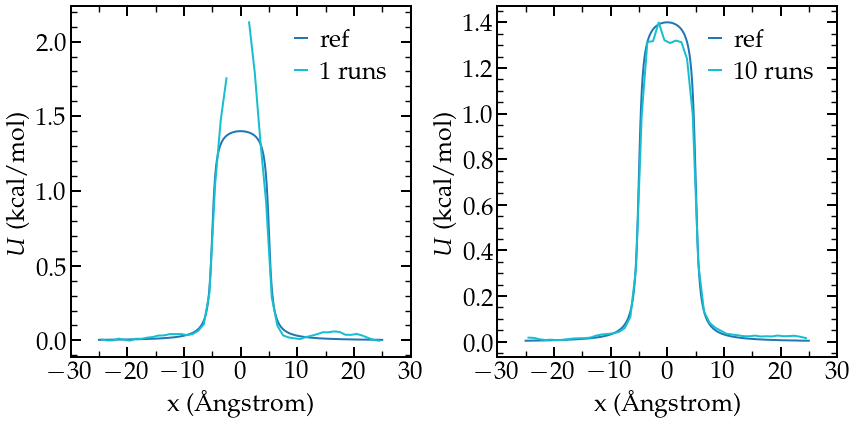

In [13]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
ax1.plot(myx, U, linewidth = 2, color = 'tab:blue', label = r'ref')
ax1.plot(x, U_free_sampling_1, linewidth = 2, color = 'tab:cyan', label = '1 runs')

#ax2.semilogy(x, rho_mean / 1e-3, linewidth = 2, color = 'tab:blue')
#ax2.semilogy(x, rho_mean / 1e-3 + rho_err / 1e-3, '--', linewidth = 2, color = 'tab:blue')
#ax2.semilogy(x, rho_mean / 1e-3 - rho_err / 1e-3, '--', linewidth = 2, color = 'tab:blue')

#divider = make_axes_locatable(ax1)
ax1.set_ylabel(r'$U$ (kcal/mol)', fontdict=font)
ax1.set_xlabel(r'x (Ångstrom)', fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.ylim(0, 60)
ax1.minorticks_on()
ax1.tick_params('both', length=10, width=2, which='major', direction='in')
ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.set_xticks([-30, -20, -10, 0, 10, 20, 30])
#ax2.set_yticks([1e-3, 1e-2, 1e-1, 1])
#labels = ['0', '$1.4$', '$2.8$', '$4.2$']
#ax2.set_yticklabels(labels)
#minor_locator_y = AutoMinorLocator(2)
#ax2.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator_x)

ax1.legend(frameon=False, fontsize=fontsize, loc='upper right', handletextpad=0.5,
          handlelength = 0.5, borderpad = 0.4, labelspacing=0.3) 

ax2 = fig.add_subplot(122)
ax2.plot(myx, U, linewidth = 2, color = 'tab:blue', label = r'ref')
ax2.plot(x, U_free_sampling_10, linewidth = 2, color = 'tab:cyan', label = '10 runs')

#ax2.semilogy(x, rho_mean / 1e-3, linewidth = 2, color = 'tab:blue')
#ax2.semilogy(x, rho_mean / 1e-3 + rho_err / 1e-3, '--', linewidth = 2, color = 'tab:blue')
#ax2.semilogy(x, rho_mean / 1e-3 - rho_err / 1e-3, '--', linewidth = 2, color = 'tab:blue')

#divider = make_axes_locatable(ax1)
ax2.set_ylabel(r'$U$ (kcal/mol)', fontdict=font)
ax2.set_xlabel(r'x (Ångstrom)', fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.ylim(0, 60)
ax2.minorticks_on()
ax2.tick_params('both', length=10, width=2, which='major', direction='in')
ax2.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.spines["top"].set_linewidth(2)
ax2.spines["bottom"].set_linewidth(2)
ax2.spines["left"].set_linewidth(2)
ax2.spines["right"].set_linewidth(2)
ax2.set_xticks([-30, -20, -10, 0, 10, 20, 30])
#ax2.set_yticks([1e-3, 1e-2, 1e-1, 1])
#labels = ['0', '$1.4$', '$2.8$', '$4.2$']
#ax2.set_yticklabels(labels)
#minor_locator_y = AutoMinorLocator(2)
#ax2.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax2.xaxis.set_minor_locator(minor_locator_x)

ax2.legend(frameon=False, fontsize=fontsize, loc='upper right', handletextpad=0.5,
          handlelength = 0.5, borderpad = 0.4, labelspacing=0.3) 

fig.tight_layout()
plt.savefig('Potential_free_sampling.png', bbox_inches = 'tight', pad_inches = 0.057)  
plt.show()

In [14]:
file1 = open('density_profile_10run_largeU0.dat', 'r')
Lines = file1.readlines()
Lines = Lines[3:]
twoDmap_bond = []
all_profile = []
for i in range(len(Lines) // 51):
    n = i*51 + 1
    m = (i+1)*51
    matrix = Lines[n:m]
    data = []
    for line in matrix:
        splitted = np.float32(line.split())    
        data.append([splitted[1], splitted[3]])
    data = np.array(data)
    x = data.T[0]
    all_profile.append(data.T[1])
# 3: 17
rho_mean_largeU0 = np.mean(all_profile, axis=0)
rho_err_largeU0 = np.std(all_profile, axis=0) / np.sqrt(i)

In [15]:
U_free_sampling_largeU0 = - R*T * np.log(rho_mean_largeU0 / rho_0)
U_free_sampling_largeU0 /= 4184 # kcal / mol

<ipython-input-15-4fd78d7a8950>:1: RuntimeWarning: divide by zero encountered in log
  U_free_sampling_largeU0 = - R*T * np.log(rho_mean_largeU0 / rho_0)


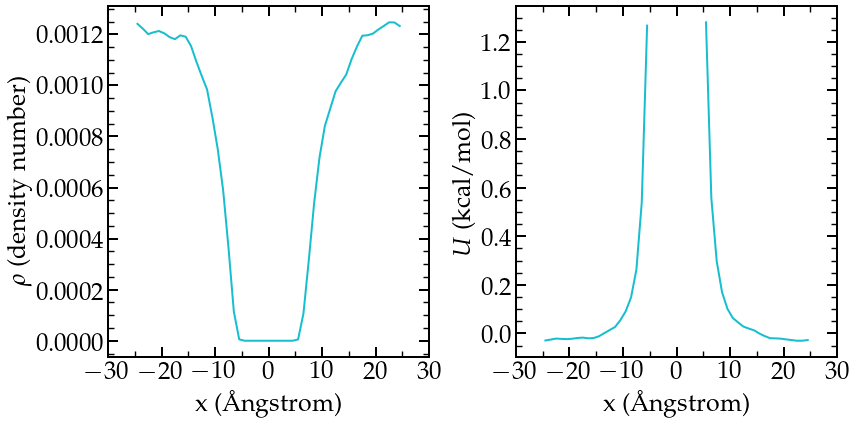

In [16]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
ax1.plot(x, rho_mean_largeU0, linewidth = 2, color = 'tab:cyan', label = '1 runs')

#ax2.semilogy(x, rho_mean / 1e-3, linewidth = 2, color = 'tab:blue')
#ax2.semilogy(x, rho_mean / 1e-3 + rho_err / 1e-3, '--', linewidth = 2, color = 'tab:blue')
#ax2.semilogy(x, rho_mean / 1e-3 - rho_err / 1e-3, '--', linewidth = 2, color = 'tab:blue')

#divider = make_axes_locatable(ax1)
ax1.set_ylabel(r'$\rho$ (density number)', fontdict=font)
ax1.set_xlabel(r'x (Ångstrom)', fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.ylim(0, 60)
ax1.minorticks_on()
ax1.tick_params('both', length=10, width=2, which='major', direction='in')
ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.set_xticks([-30, -20, -10, 0, 10, 20, 30])
#ax2.set_yticks([1e-3, 1e-2, 1e-1, 1])
#labels = ['0', '$1.4$', '$2.8$', '$4.2$']
#ax2.set_yticklabels(labels)
#minor_locator_y = AutoMinorLocator(2)
#ax2.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator_x)

#ax1.legend(frameon=False, fontsize=fontsize, loc='upper right', handletextpad=0.5,
#          handlelength = 0.5, borderpad = 0.4, labelspacing=0.3) 

ax2 = fig.add_subplot(122)
ax2.plot(x, U_free_sampling_largeU0, linewidth = 2, color = 'tab:cyan', label = 'large $U_0$')

#ax2.semilogy(x, rho_mean / 1e-3, linewidth = 2, color = 'tab:blue')
#ax2.semilogy(x, rho_mean / 1e-3 + rho_err / 1e-3, '--', linewidth = 2, color = 'tab:blue')
#ax2.semilogy(x, rho_mean / 1e-3 - rho_err / 1e-3, '--', linewidth = 2, color = 'tab:blue')

#divider = make_axes_locatable(ax1)
ax2.set_ylabel(r'$U$ (kcal/mol)', fontdict=font)
ax2.set_xlabel(r'x (Ångstrom)', fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.ylim(0, 60)
ax2.minorticks_on()
ax2.tick_params('both', length=10, width=2, which='major', direction='in')
ax2.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.spines["top"].set_linewidth(2)
ax2.spines["bottom"].set_linewidth(2)
ax2.spines["left"].set_linewidth(2)
ax2.spines["right"].set_linewidth(2)
ax2.set_xticks([-30, -20, -10, 0, 10, 20, 30])
#ax2.set_yticks([1e-3, 1e-2, 1e-1, 1])
#labels = ['0', '$1.4$', '$2.8$', '$4.2$']
#ax2.set_yticklabels(labels)
#minor_locator_y = AutoMinorLocator(2)
#ax2.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax2.xaxis.set_minor_locator(minor_locator_x)

#ax2.legend(frameon=False, fontsize=fontsize, loc='upper right', handletextpad=0.5,
#          handlelength = 0.5, borderpad = 0.4, labelspacing=0.3) 

fig.tight_layout()
plt.savefig('Potential_free_sampling_largeU0.png', bbox_inches = 'tight', pad_inches = 0.057)  
plt.show()

# PMF

In [26]:
file2 = open('PMF_0.04ns.dat', 'r')
Lines = file2.readlines()
Lines = Lines[2:]
PMF_004ns = []
for line in Lines:
    line_splitted = line.split()
    timestep, density_central = np.int32(line_splitted[0]), \
                                         np.float32(line_splitted[1])
        
    PMF_004ns.append([timestep, density_central])    
PMF_004ns = np.array(PMF_004ns)  

In [35]:
file2 = open('PMF_0.4ns.dat', 'r')
Lines = file2.readlines()
Lines = Lines[2:]
PMF_04ns = []
for line in Lines:
    line_splitted = line.split()
    timestep, density_central = np.int32(line_splitted[0]), \
                                         np.float32(line_splitted[1])
        
    PMF_04ns.append([timestep, density_central])    
PMF_04ns = np.array(PMF_04ns)  

In [36]:
file2 = open('PMF_2ns.dat', 'r')
Lines = file2.readlines()
Lines = Lines[2:]
PMF_2ns = []
for line in Lines:
    line_splitted = line.split()
    timestep, density_central = np.int32(line_splitted[0]), \
                                         np.float32(line_splitted[1])
        
    PMF_2ns.append([timestep, density_central])    
PMF_2ns = np.array(PMF_2ns)  

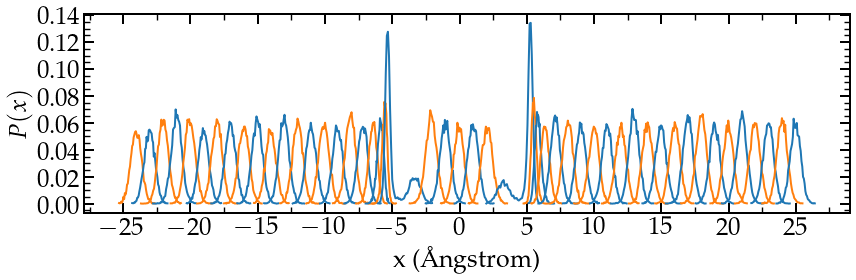

In [37]:
fig = plt.figure(figsize=(12, 4))

ax2 = fig.add_subplot(111)

#ax1.legend(frameon=False, fontsize=fontsize, loc='upper right', handletextpad=0.5,
#          handlelength = 0.5, borderpad = 0.4, labelspacing=0.3) 

for x0 in np.arange(1, 51):
    file1 = np.loadtxt('position.'+str(x0)+'.dat')
    des_pos = file1[0][2]
    pos =  file1.T[1]
    occurence, umx = np.histogram(pos, bins = 50)
    occurence = np.array(occurence) / np.sum(occurence)
    if x0 % 2 == 0:
        ax2.plot(umx[:-1], occurence, linewidth = 2, color = 'tab:blue')
    else:
        ax2.plot(umx[:-1], occurence, linewidth = 2, color = 'tab:orange')        

#ax2.semilogy(x, rho_mean / 1e-3, linewidth = 2, color = 'tab:blue')
#ax2.semilogy(x, rho_mean / 1e-3 + rho_err / 1e-3, '--', linewidth = 2, color = 'tab:blue')
#ax2.semilogy(x, rho_mean / 1e-3 - rho_err / 1e-3, '--', linewidth = 2, color = 'tab:blue')

#divider = make_axes_locatable(ax1)
ax2.set_ylabel(r'$P(x)$', fontdict=font)
ax2.set_xlabel(r'x (Ångstrom)', fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.ylim(0, 60)
ax2.minorticks_on()
ax2.tick_params('both', length=10, width=2, which='major', direction='in')
ax2.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.spines["top"].set_linewidth(2)
ax2.spines["bottom"].set_linewidth(2)
ax2.spines["left"].set_linewidth(2)
ax2.spines["right"].set_linewidth(2)
ax2.set_xticks([-25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25])
#ax2.set_yticks([1e-3, 1e-2, 1e-1, 1])
#labels = ['0', '$1.4$', '$2.8$', '$4.2$']
#ax2.set_yticklabels(labels)
#minor_locator_y = AutoMinorLocator(2)
#ax2.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax2.xaxis.set_minor_locator(minor_locator_x)

#ax2.legend(frameon=False, fontsize=fontsize, loc='upper right', handletextpad=0.5,
#          handlelength = 0.5, borderpad = 0.4, labelspacing=0.3) 

fig.tight_layout()
plt.savefig('Density_Probability.png', bbox_inches = 'tight', pad_inches = 0.057)  
plt.show()

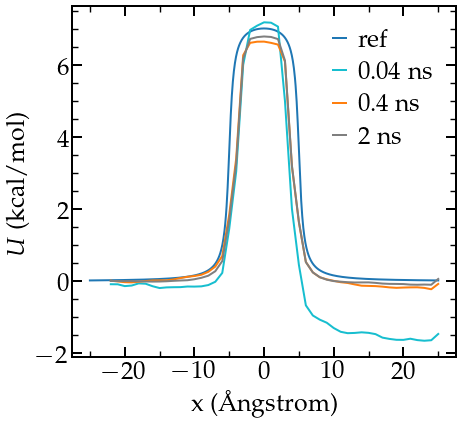

In [39]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
ax1.plot(myx, U*5, linewidth = 2, color = 'tab:blue', label = r'ref')
ax1.plot(PMF_004ns.T[0] - 24, PMF_004ns.T[1], linewidth = 2, color = 'tab:cyan', label = '0.04 ns')
ax1.plot(PMF_04ns.T[0] - 24, PMF_04ns.T[1], linewidth = 2, color = 'tab:orange', label = '0.4 ns')
ax1.plot(PMF_2ns.T[0] - 24, PMF_2ns.T[1], linewidth = 2, color = 'tab:gray', label = '2 ns')

#ax2.semilogy(x, rho_mean / 1e-3, linewidth = 2, color = 'tab:blue')
#ax2.semilogy(x, rho_mean / 1e-3 + rho_err / 1e-3, '--', linewidth = 2, color = 'tab:blue')
#ax2.semilogy(x, rho_mean / 1e-3 - rho_err / 1e-3, '--', linewidth = 2, color = 'tab:blue')

#divider = make_axes_locatable(ax1)
ax1.set_ylabel(r'$U$ (kcal/mol)', fontdict=font)
ax1.set_xlabel(r'x (Ångstrom)', fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.ylim(0, 60)
ax1.minorticks_on()
ax1.tick_params('both', length=10, width=2, which='major', direction='in')
ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
#ax1.set_xticks([-30, -20, -10, 0, 10, 20, 30])
#ax2.set_yticks([1e-3, 1e-2, 1e-1, 1])
#labels = ['0', '$1.4$', '$2.8$', '$4.2$']
#ax2.set_yticklabels(labels)
#minor_locator_y = AutoMinorLocator(2)
#ax2.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator_x)

ax1.legend(frameon=False, fontsize=fontsize, loc='upper right', handletextpad=0.5,
          handlelength = 0.5, borderpad = 0.4, labelspacing=0.3) 



fig.tight_layout()
plt.savefig('Potential_umbrella_sampling.png', bbox_inches = 'tight', pad_inches = 0.057)  
plt.show()